In [15]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
fly = pd.read_csv(url, sep = ',')
url_2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
weather = pd.read_csv(url_2, sep = ',')

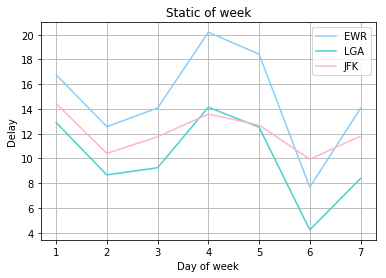

In [40]:
fly['day-of-week'] = pd.to_datetime(fly[['year', 'month', 'day', 'hour']])
fly['day-of-week'] = fly['day-of-week'].apply(lambda x: x.weekday())

plt.plot(np.array([i for i in range(7)]) + 1, np.array(fly[fly['origin']=='EWR'].groupby('day-of-week')['dep_delay'].mean()), label='EWR', color = 'lightskyblue')
plt.plot(np.array([i for i in range(7)]) + 1, np.array(fly[fly['origin']=='LGA'].groupby('day-of-week')['dep_delay'].mean()), label='LGA', color = 'mediumturquoise')
plt.plot(np.array([i for i in range(7)]) + 1, np.array(fly[fly['origin']=='JFK'].groupby('day-of-week')['dep_delay'].mean()), label='JFK', color = 'lightpink')

plt.legend()
plt.xlabel('Day of week')
plt.ylabel('Delay')
plt.title('Static of week')
plt.grid()

plt.show()

Вывод 1: Во всех трех аэропортах Нью-Йорка одинаковая ситуация со статистикой задержек отправления, видимо в субботу Нью-Йорк
покидает меньшее количество человек. В связи с этим стоит увеличить скорость обслуживания увеличением количества работников, напрмер. (особенно в среду)
Вывод 2: В аэропорте EWR заметно сильнее задержки, поэтому стоит перераспределить рейсы между аэропортами.

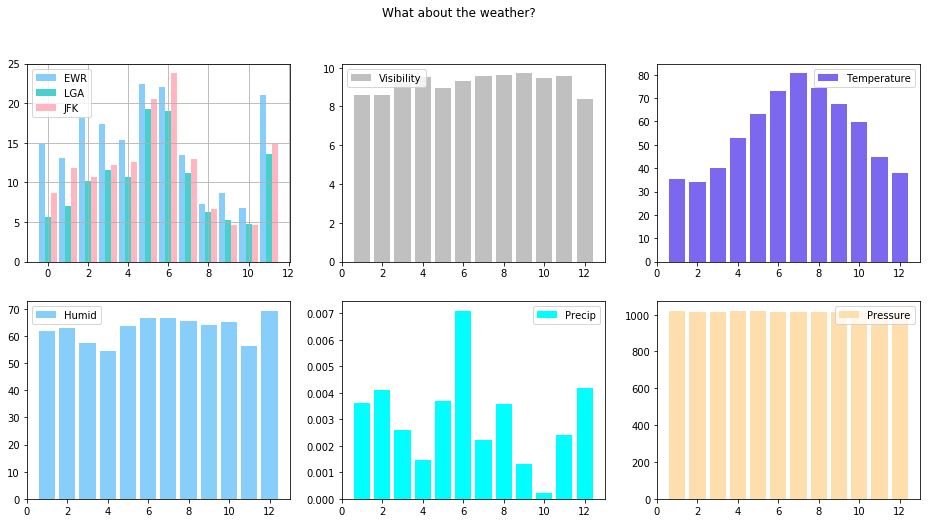

In [68]:

fig, axs = plt.subplots(2, 3, figsize=(16,8))
fig.suptitle('What about the weather?')

axs[0, 0].bar(np.array([i for i in range(12)]) - 0.3, np.array(fly[fly['origin']=='EWR'].groupby('month')['dep_delay'].mean()), width = 0.3, label='EWR', color = 'lightskyblue')
axs[0, 0].bar(np.array([i for i in range(12)]), np.array(fly[fly['origin']=='LGA'].groupby('month')['dep_delay'].mean()), width = 0.3, label='LGA', color = 'mediumturquoise')
axs[0, 0].bar(np.array([i for i in range(12)]) + 0.3, np.array(fly[fly['origin']=='JFK'].groupby('month')['dep_delay'].mean()), width = 0.3, label='JFK', color = 'lightpink')

axs[0, 1].bar(np.array([i for i in range(12)]) + 1, np.array(weather.groupby('month')['visib'].mean()), label='Visibility', color = 'silver')
axs[0, 2].bar(np.array([i for i in range(12)]) + 1, np.array(weather.groupby('month')['temp'].mean()), label='Temperature', color = 'mediumslateblue')
axs[1, 0].bar(np.array([i for i in range(12)]) + 1, np.array(weather.groupby('month')['humid'].mean()), label='Humid', color = 'lightskyblue')
axs[1, 1].bar(np.array([i for i in range(12)]) + 1, np.array(weather.groupby('month')['precip'].mean()), label='Precip', color = 'aqua')
axs[1, 2].bar(np.array([i for i in range(12)]) + 1, np.array(weather.groupby('month')['pressure'].mean()), label='Pressure', color = 'navajowhite')

axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 2].legend()
axs[1, 0].legend()
axs[1, 2].legend()
axs[1, 1].legend()
axs[0, 0].grid(True)

plt.show()

Вывод 3: Видимость, давление и влажность не влияют на задержки в аэропортах. Но из диаграм видно, что в летние месяцы задержки в разы значительнее, из чего делаем вывод, что в теплое время года с марта по август следует увеличить количество рейсов. 
Вывод 4: На время задержки влияет количество осадков, следовательно стоит повысить квалификацию пилотов или улучшить оборудование.

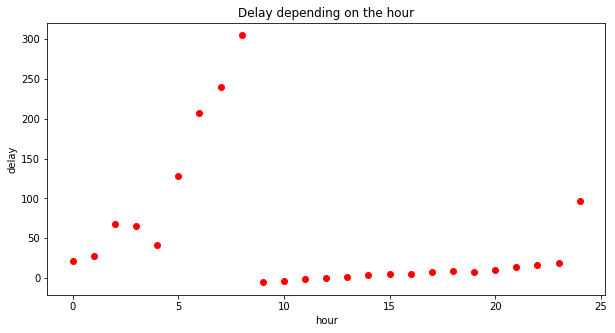

In [81]:
plt.figure(figsize=(10,5))
plt.title('Delay depending on the hour')
plt.scatter(np.array((fly['hour'].dropna()).unique()), np.array((fly.groupby('hour')['dep_delay'].mean().dropna()).sort_index()), c = 'red')
plt.xlabel('hour')
plt.ylabel('delay')

plt.show()

Вывод 5: На графике изображено распределение задержек вылета в течение суток. Наблюдается резкое возрастание с 5 до 8 утра. Следовательно в это время следует увеличить количество обслуживающего персонала и/или запустить дополнительные рейсы.

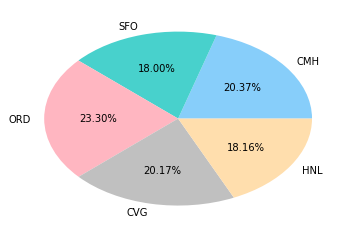

In [101]:
air = list(set(fly['dest'][fly['dep_delay'] > 1000]))

plt.pie(np.array(fly[fly['dep_delay'] > 1000].groupby('dest')['dep_delay'].mean()), labels=(air), colors = ['lightskyblue','mediumturquoise', 'lightpink', 'silver', 'navajowhite', 'mediumslateblue'], autopct='%1.2f%%')
plt.show()

Вывод 6: У рейсов в аэропорты ORD, CMH, CVG, HNL, SFO самые значительные задержки, следовательно следует увеличить частоту рейсов в эти аэропорты.